<a href="https://colab.research.google.com/github/Lenarbrs/2024-projet-final-REBOURS-LENA/blob/main/REBOURS_L%C3%A9na_Language_attractiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Introduction

# *What linguistic and phonetic factors influence French speakers' perception of the attractiveness of foreign languages ?*

**Author** : Léna Rebours

**Date** : December 2024

This project explores the factors that influence the perceived attractiveness of languages, focusing on linguistic and phonetic aspects. By analyzing responses from French speakers, the study aims to understand how specific features, such as sound patterns and phonetic diversity, shape their preferences for foreign languages.

The primary question this project seeks to answer is: What linguistic and phonetic features influence French speakers' perceptions of the attractiveness of different languages?

This question is important because understanding these factors can reveal how cultural, social, and phonetic elements intersect to shape language preferences.
It also provides insight into the role of language perception in intercultural communication, highlighting potential biases and preferences based on sound patterns and phonetic structures.

This project is inspired by [this paper](https://pmc.ncbi.nlm.nih.gov/articles/PMC10151606/) (Anikin A, Aseyev N, Erben Johansson N. *Do some languages sound more beautiful than others?*) but is more centralised on French speaker perceptions.


**Predictions :**
- **P1** : Speakers find languages more attractive when they belong to the same linguistic subfamily as their native language (also known as the "*linguistic comfort zone*" hypothesis), in our case Romance subfamily
- **P2** : Languages with a small variety of vowels are perceived as less attractive

NB : In this project, AI was used to debug certain codes, identify errors, and suggest improvements for better performance.

# II. Library Import

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# III. Data Import

In order to test these predictions, I created a survey disponible [here](https://docs.google.com/forms/d/e/1FAIpQLSd5wvtWPO6FUz6OLQD2hgDzdQHa6sS-wAhcWOkVhKLRw0e03Q/viewform?usp=sf_link) that asks basics informations about the respondant such as their gender and linguitics related informations such as their native language, the languages in which they are fluent and the country in which they are currently living. In order to minimize biais due to the gender of speakers, I selected audios with only female voices. I collected 77 answers, mostly my classmates and friends.

Then, the respondant had to listen to 9 short audio samples and had to rate them on a Likert scale of attractiveness. The dataset of audio is composed of excerpts I selected from audiobooks narrated by native speakers from [Librivox](https://librivox.org) (public domain), except for the Arabic audio, which was recorded by a friend.

In [ ]:
print("\nFigure 1. Language selected and their characteristics\n")

data = {
    "Audio": [
        "Audio 1", "Audio 2", "Audio 3", "Audio 4", "Audio 5",
        "Audio 6", "Audio 7", "Audio 8", "Audio 9"
    ],
    "Language": [
        "Italian", "German", "English", "Japanese", "Mandarin",
        "Russian", "Spanish", "Arabic", "French"
    ],
    "Linguistic Family": [
        "Indo-European", "Indo-European", "Indo-European", "Japonic", "Sino-Tibetan",
        "Indo-European", "Indo-European", "Afro-Asiatic", "Indo-European"
    ],
    "Subfamily": [
        "Romance", "Germanic", "Germanic", "No subfamily", "Sino-Chinese",
        "Slavic", "Romance", "Semitic", "Romance"
    ],
    "Variety of Vowels": [
        "31 segments", "19 segments", "16 segments", "11 segments", "21 segments",
        "6 segments", "20 segments", "8 segments", "17 segments"
    ]
}

# Create the dataframe
df_audio = pd.DataFrame(data)
df_audio



Figure 1. Language selected and their characteristics



,Audio,Language,Linguistic Family,Subfamily,Variety of Vowels
0,Audio 1,Italian,Indo-European,Romance,31 segments
1,Audio 2,German,Indo-European,Germanic,19 segments
2,Audio 3,English,Indo-European,Germanic,16 segments
3,Audio 4,Japanese,Japonic,No subfamily,11 segments
4,Audio 5,Mandarin,Sino-Tibetan,Sino-Chinese,21 segments
5,Audio 6,Russian,Indo-European,Slavic,6 segments
6,Audio 7,Spanish,Indo-European,Romance,20 segments
7,Audio 8,Arabic,Afro-Asiatic,Semitic,8 segments
8,Audio 9,French,Indo-European,Romance,17 segments


In [ ]:
# Upload the dataset
uploaded = files.upload()

Saving Perceptions of Language Attractiveness 2.csv to Perceptions of Language Attractiveness 2 (1).csv


In [ ]:
# Read the Dataset
df = pd.read_csv("Perceptions of Language Attractiveness 2.csv", delimiter = ";")
df

,Horodateur,Quel est votre genre ?,Dans quel pays vivez-vous ?,Quelle est votre langue maternelle ?,Quelles langues parlez-vous couramment ?,A quel point est-ce que vous trouvez cette langue attirante ?,A quel point est-ce que vous trouvez cette langue attirante ? .1,A quel point est-ce que vous trouvez cette langue attirante ? .2,A quel point est-ce que vous trouvez cette langue attirante ? .3,A quel point est-ce que vous trouvez cette langue attirante ? .4,A quel point est-ce que vous trouvez cette langue attirante ? .5,A quel point est-ce que vous trouvez cette langue attirante ? .6,A quel point est-ce que vous trouvez cette langue attirante ? .7,A quel point est-ce que vous trouvez cette langue attirante ? .8,Pensez-vous que votre perception (positive ou négative) de la culture d’un pays influence votre perception de sa langue ?
0,2024/12/06 11:48:15 AM UTC+1,Homme,France,Russian,"Russian, English",Assez attirante,Assez attirante,Très attirante,Assez attirante,Assez attirante,Très attirante,Attirante,Assez attirante,Très attirante,Non
1,2024/12/16 6:51:38 PM UTC+1,Femme,France,Français,Français,Attirante,Pas très attirante,Pas très attirante,Attirante,Assez attirante,Pas très attirante,Assez attirante,Assez attirante,Assez attirante,Non
2,2024/12/16 7:18:49 PM UTC+1,Femme,France,Français,Français,Assez attirante,Pas très attirante,Pas attirante,Assez attirante,Pas attirante du tout,Attirante,Assez attirante,Pas très attirante,Très attirante,Oui
3,2024/12/16 7:47:51 PM UTC+1,Femme,France,Français,Français,Très attirante,Pas attirante du tout,Attirante,Très attirante,Pas attirante du tout,Pas attirante du tout,Assez attirante,Très attirante,Assez attirante,Oui
4,2024/12/16 8:14:39 PM UTC+1,Femme,France,Français,"Français, Anglais",Attirante,Assez attirante,Attirante,Pas très attirante,Pas attirante,Pas très attirante,Assez attirante,Assez attirante,Attirante,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2025/01/06 4:16:00 PM UTC+1,Femme,France,rif,"rif, arabe , francais",Assez attirante,Assez attirante,Assez attirante,Assez attirante,Assez attirante,Assez attirante,Assez attirante,Assez attirante,Assez attirante,Oui
74,2025/01/06 10:53:51 PM UTC+1,Femme,France,France,Francais,Très attirante,Pas très attirante,Assez attirante,Très attirante,Pas très attirante,Pas attirante,Très attirante,Pas attirante du tout,Très attirante,Oui
75,2025/01/07 1:51:02 PM UTC+1,Femme,France,français,"français, anglais",Attirante,Attirante,Attirante,Attirante,Attirante,Assez attirante,Assez attirante,Attirante,Attirante,Non
76,2025/01/07 1:52:19 PM UTC+1,Femme,France,Français,Français & Anglais,Assez attirante,Attirante,Assez attirante,Attirante,Attirante,Très attirante,Attirante,Attirante,Assez attirante,Oui


# III. Data Manipulation

We will now clean the dataset, rename the columns to English, and erase mistakes of some answers (fix typos, etc.).

In [ ]:
# Drop the useless column
df = df.drop('Horodateur', axis = 1)

In [ ]:
# We will rename the columns to link them to the corresponding language, and then associate the responses with numbers

df.columns = ['Genre', 'Country', 'Native_Language', 'Fluent_Language', 'Italian',
              'German', 'English', 'Japanese', 'Mandarin', 'Russian', 'Spanish',
              'Arabic', 'French', 'Culture_Influence']

df = df.replace({
    'Pas attirante du tout': 1,
    'Pas attirante': 2,
    'Pas très attirante': 3,
    'Assez attirante': 4,
    'Attirante': 5,
    'Très attirante': 6,
    'Oui' : 1,
    'Non' : 0,
    'Homme' : 'Man',
    'Femme' : 'Woman'
})

df

<ipython-input-270-c7dc30968e06>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,Genre,Country,Native_Language,Fluent_Language,Italian,German,English,Japanese,Mandarin,Russian,Spanish,Arabic,French,Culture_Influence
0,Man,France,Russian,"Russian, English",4.0,4.0,6.0,4.0,4.0,6.0,5.0,4.0,6.0,0
1,Woman,France,Français,Français,5.0,3.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,0
2,Woman,France,Français,Français,4.0,3.0,2.0,4.0,1.0,5.0,4.0,3.0,6.0,1
3,Woman,France,Français,Français,6.0,1.0,5.0,6.0,1.0,1.0,4.0,6.0,4.0,1
4,Woman,France,Français,"Français, Anglais",5.0,4.0,5.0,3.0,2.0,3.0,4.0,4.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Woman,France,rif,"rif, arabe , francais",4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
74,Woman,France,France,Francais,6.0,3.0,4.0,6.0,3.0,2.0,6.0,1.0,6.0,1
75,Woman,France,français,"français, anglais",5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,0
76,Woman,France,Français,Français & Anglais,4.0,5.0,4.0,5.0,5.0,6.0,5.0,5.0,4.0,1


In [ ]:
# Cleaning the "Native_Language" column
df['Native_Language'] = df['Native_Language'].str.lower()  # Convert to lowercase
df['Native_Language'] = df['Native_Language'].str.replace("ç", "c")  # Replace "ç" with "c"
df['Native_Language'] = df['Native_Language'].str.strip()  # Remove leading and trailing spaces

# Create a new DataFrame with the cleaned languages
df_cleaned = pd.DataFrame(df, columns=["Native_Language"])


In [ ]:
# Cleaning the "Native_Language" column
df['Native_Language'] = df['Native_Language'].str.lower()  # Convert to lowercase
df['Native_Language'] = df['Native_Language'].str.replace("ç", "c")  # Replace "ç" with "c"
df['Native_Language'] = df['Native_Language'].str.strip()  # Remove leading and trailing spaces

# We do the same thing with the "Country" column
df['Country'] = df['Country'].str.lower()  # Convert to lowercase
df['Country'] = df['Country'].str.replace("ç", "c")  # Replace "ç" with "c"
df['Country'] = df['Country'].str.strip()  # Remove leading and trailing spaces

# Remove rows where "Native_Language" contains "et" or "/"
df = df[~df['Native_Language'].str.contains('et|/', case=False, na=False)]

# Replace variants of "French" and "Arabic"
df['Native_Language'] = df['Native_Language'].replace({
    "francais": "french",
    "francais ": "french",
    "francaise": "french",
    "le francais": "french",
    "france": "french",
    "japonais" : "japanese",
    "français / Arabe" : "french and Arabic",
    "français et portugais " : "french and portuguese",
    "arabe" : "arabic",
    "français/polonais " : "french and polish",
    "norvégien" : "norwegian"
})

# Capitalize the first letter of each value
df['Native_Language'] = df['Native_Language'].str.title()
df['Country'] = df['Country'].str.title()

# Create a new DataFrame with the cleaned languages
df_cleaned = pd.DataFrame(df, columns=["Native_Language"])


<ipython-input-272-fcc3dddce4f5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Native_Language'] = df['Native_Language'].replace({
<ipython-input-272-fcc3dddce4f5>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Native_Language'] = df['Native_Language'].str.title()
<ipython-input-272-fcc3dddce4f5>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

# IV. Data Description

We will first look at the distribution of the profile of respondants and the rating of the different languages.

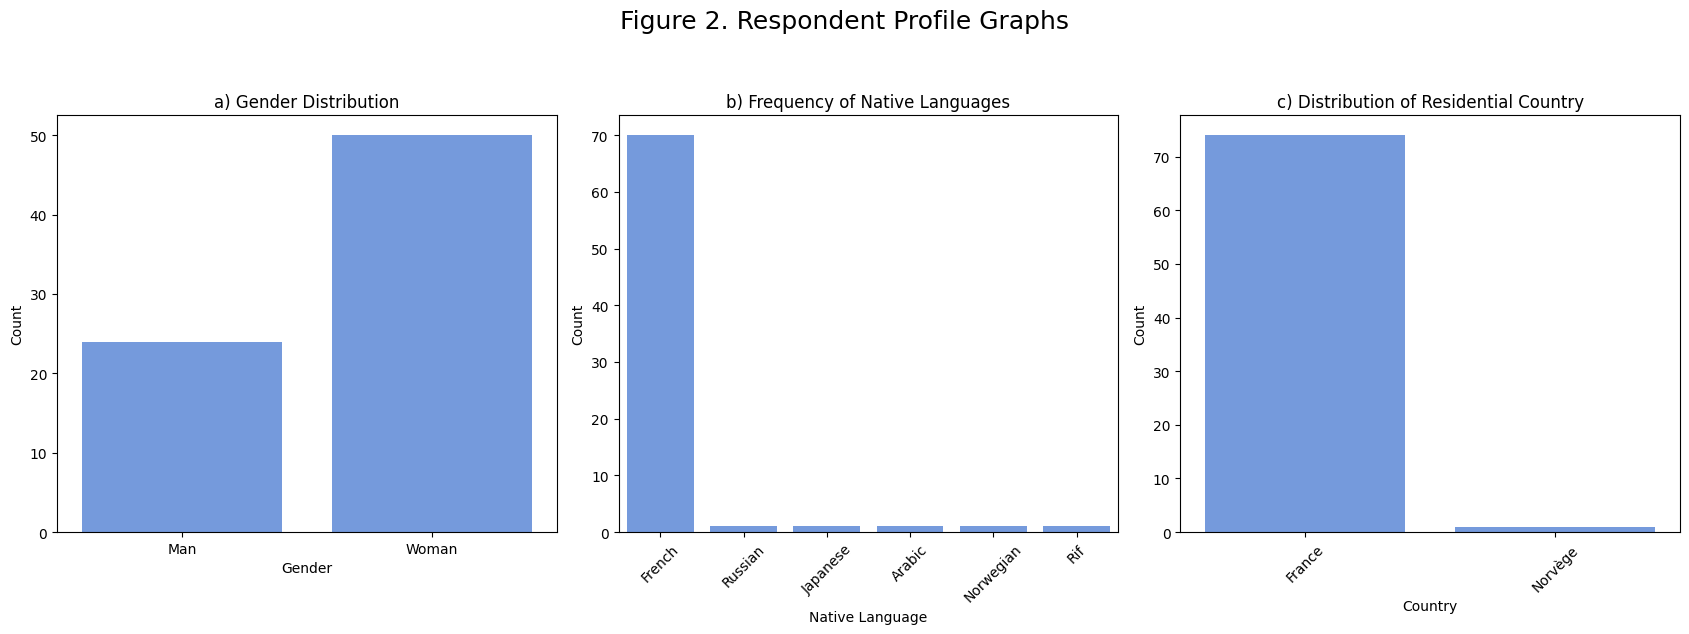

In [ ]:
# Create a panel with subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 6))  # 1 row and 3 columns
axes = axes.flatten()

# Barplot of Gender Distribution
sns.countplot(x='Genre', data=df, color='cornflowerblue', ax=axes[0])
axes[0].set_title('a) Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Barplot of Native Language Frequency
language_counts = df_cleaned['Native_Language'].value_counts()
sns.barplot(x=language_counts.index, y=language_counts.values, color="cornflowerblue", ax=axes[1])
axes[1].set_title('b) Frequency of Native Languages')
axes[1].set_xlabel('Native Language')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Barplot of Country Distribution
sns.countplot(x='Country', data=df, color="cornflowerblue", ax=axes[2])
axes[2].set_title('c) Distribution of Residential Country')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

# Add the main title for the entire figure
fig.suptitle('Figure 2. Respondent Profile Graphs', fontsize=18, y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


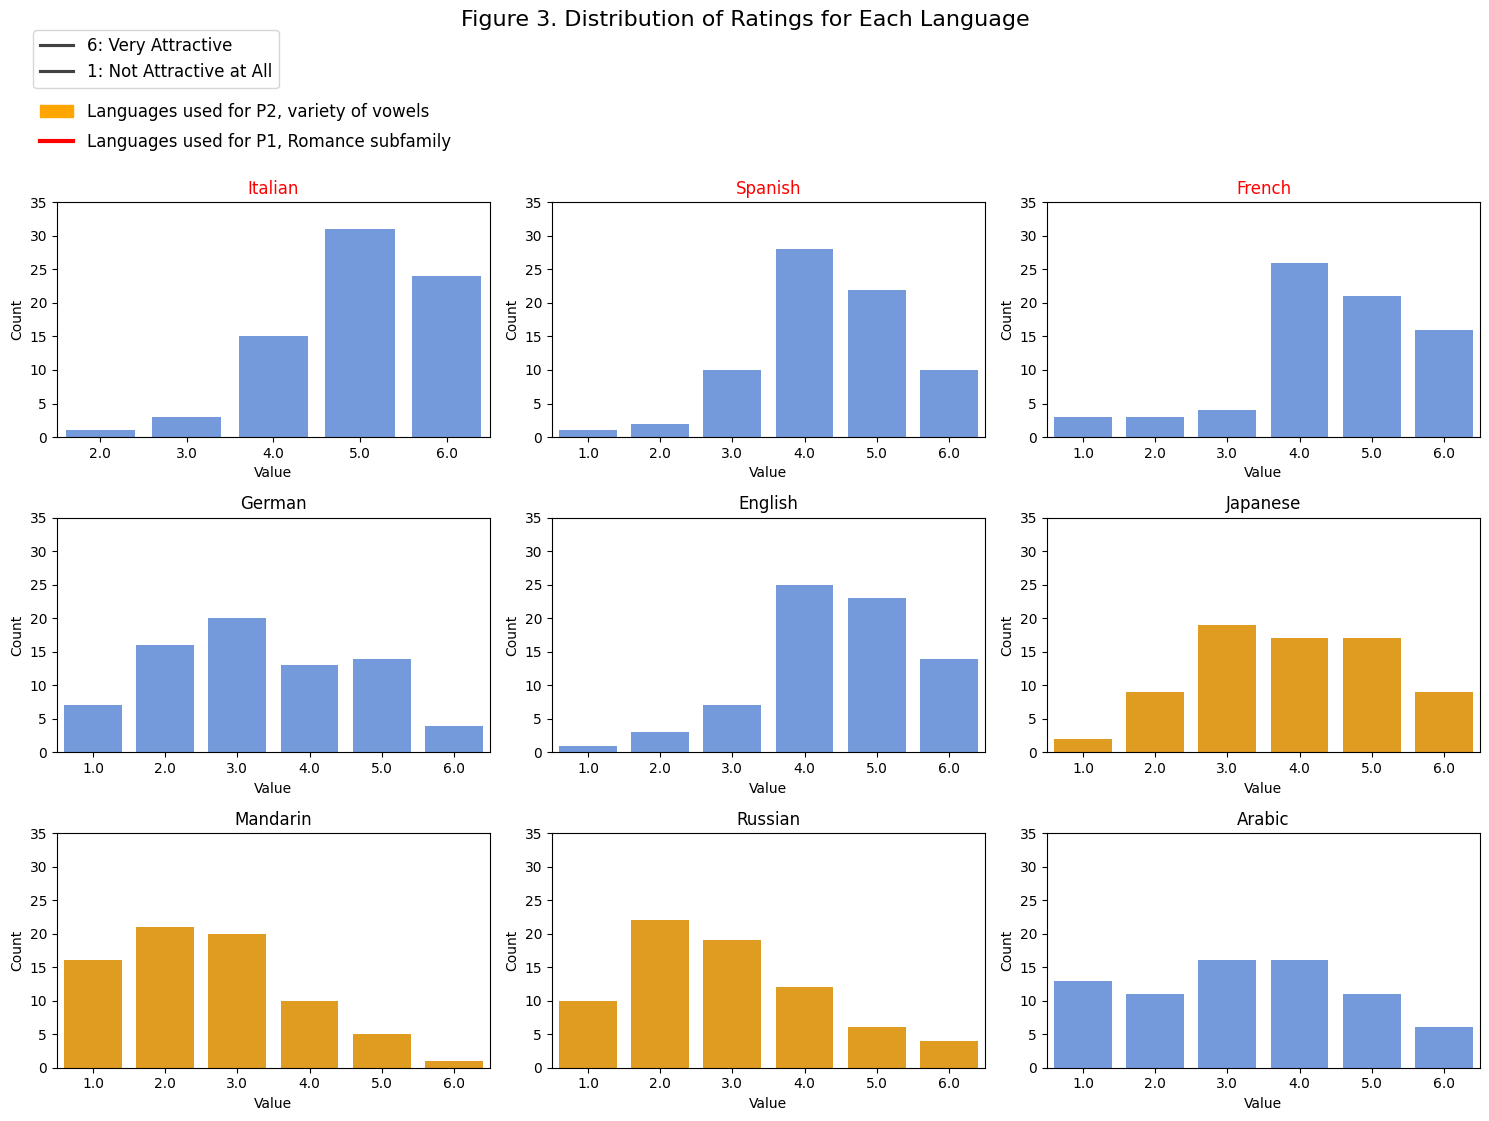

In [ ]:
# List of language columns
columns = ['Italian', 'Spanish', 'French', 'German', 'English', 'Japanese', 'Mandarin', 'Russian', 'Arabic']

# Create a panel with subplots for each graph
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Create a barplot for each language in the selected columns
for i, column in enumerate(columns):
    # Set the color based on the language
    if column in ['Russian', 'Mandarin', 'Japanese']:
        color = 'orange'  # Orange color for "Russian", "Mandarin", and "Japanese" to better see the languages that we will use for P2
    else:
        color = 'cornflowerblue'

    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, ax=axes[i], color=color)

    # Highlight "French", "Spanish", and "Italian" in red
    title_color = 'red' if column in ['French', 'Spanish', 'Italian'] else 'black'
    axes[i].set_title(column, color=title_color)

    # Label the axes
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    axes[i].set_ylim(0, 35)

# Adjust the subplots
plt.subplots_adjust(top=0.85, bottom=0.1)

# Add a legend for the x-axis: 1 means "Not Attractive at All" and 6 means "Very Attractive"
fig.legend(
    labels=["6: Very Attractive", "1: Not Attractive at All"],
    loc='upper left',
    fontsize=12,
    frameon=True,
    bbox_to_anchor=(0.02, 0.92)
)

# Add a legend for the orange bars, representing languages used for P2
fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color='orange', label="Languages used for P2, variety of vowels")],
    loc='upper left',
    fontsize=12,
    frameon=False,
    bbox_to_anchor=(0.02, 0.865)
)

# Add a legend for the red language names, representing languages used for P1
fig.legend(
    handles=[plt.Line2D([0], [0], color='red', lw=3, label="Languages used for P1, Romance subfamily")],
    loc='upper left',
    fontsize=12,
    frameon=False,
    bbox_to_anchor=(0.02, 0.84)
)

# Add a main title for the entire figure
fig.suptitle("Figure 3. Distribution of Ratings for Each Language", fontsize=16, y=0.93)

# Adjust the layout spacing
plt.tight_layout(rect=[0, 0, 1, 0.83])
plt.show()


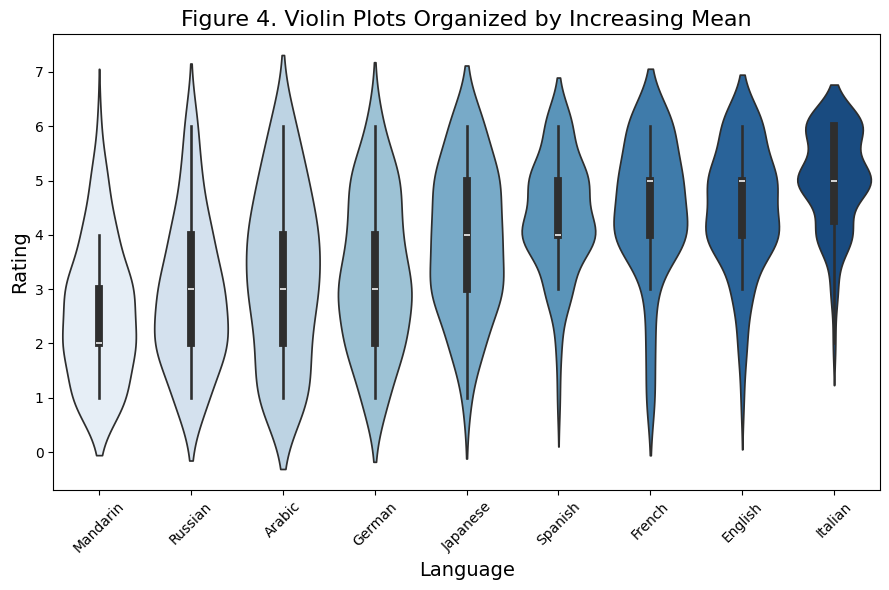

In [ ]:
# List of columns to display
columns = ['Italian', 'German', 'English', 'Japanese', 'Mandarin', 'Russian', 'Spanish', 'Arabic', 'French']

# Calculate the mean for each column and sort the columns by mean
mean_values = df[columns].mean().sort_values()

# Create a single plot with all the violin plots, sorted by mean
plt.figure(figsize=(9, 6))

# Create a violinplot for each column, using the sorted order
sns.violinplot(data=df[mean_values.index], order=mean_values.index, palette="Blues")

# Add a title and labels
plt.title('Figure 4. Violin Plots Organized by Increasing Mean', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# V. Predictions

## a. Prediction 1

In this section, we will first test our initial hypothesis: that speakers find languages more attractive when they belong to the same linguistic subfamily as their native language (also known as the "linguistic comfort zone" hypothesis). In our case, this subfamily is the Romance subfamily.

To do this, we will group the languages that belong to the same linguistic subfamily as French, namely the Romance languages—French, Italian, and Spanish—and all the other languages that do not belong to this subfamily.

We will also calculate the average ratings for each respondant, one mean for the Romance languages and one mean for languages from other linguistic families. To do this, we will create two new columns to represent these averages.

In [ ]:
# List of specific columns
same_subfamily_columns = ["Italian", "French", "Spanish"]
other_subfamily_columns = ["Mandarin", "Russian", "Japanese", "English", "German", "Arabic"]

# Add a column "Same_subfamily" with the row-wise mean of the columns from the first group
df["Same_subfamily"] = df[same_subfamily_columns].mean(axis=1)

# Add a column "Other_subfamily" with the row-wise mean of the columns from the second group
df["Other_subfamily"] = df[other_subfamily_columns].mean(axis=1)

df

<ipython-input-276-e40da5b8773a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Same_subfamily"] = df[same_subfamily_columns].mean(axis=1)
<ipython-input-276-e40da5b8773a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Other_subfamily"] = df[other_subfamily_columns].mean(axis=1)


,Genre,Country,Native_Language,Fluent_Language,Italian,German,English,Japanese,Mandarin,Russian,Spanish,Arabic,French,Culture_Influence,Same_subfamily,Other_subfamily
0,Man,France,Russian,"Russian, English",4.0,4.0,6.0,4.0,4.0,6.0,5.0,4.0,6.0,0,5.000000,4.666667
1,Woman,France,French,Français,5.0,3.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,0,4.333333,3.666667
2,Woman,France,French,Français,4.0,3.0,2.0,4.0,1.0,5.0,4.0,3.0,6.0,1,4.666667,3.000000
3,Woman,France,French,Français,6.0,1.0,5.0,6.0,1.0,1.0,4.0,6.0,4.0,1,4.666667,3.333333
4,Woman,France,French,"Français, Anglais",5.0,4.0,5.0,3.0,2.0,3.0,4.0,4.0,5.0,1,4.666667,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Woman,France,Rif,"rif, arabe , francais",4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1,4.000000,4.000000
74,Woman,France,French,Francais,6.0,3.0,4.0,6.0,3.0,2.0,6.0,1.0,6.0,1,6.000000,3.166667
75,Woman,France,French,"français, anglais",5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,0,4.666667,4.833333
76,Woman,France,French,Français & Anglais,4.0,5.0,4.0,5.0,5.0,6.0,5.0,5.0,4.0,1,4.333333,5.000000


In [ ]:
# Calculate the means of the columns
same_subfamily_mean = df["Same_subfamily"].mean()
other_subfamily_mean = df["Other_subfamily"].mean()

# Display the results
print(f"Mean of the rating for languages of the same subfamily (Romance): {same_subfamily_mean}")
print(f"Mean of the rating for any other subfamily': {other_subfamily_mean}")

Mean of the rating for languages of the same subfamily (Romance): 4.608108108108107
Mean of the rating for any other subfamily': 3.425675675675676


The average ratings for languages of the same subfamily are higher compared to the rest of the languages, which seems to support our hypothesis.

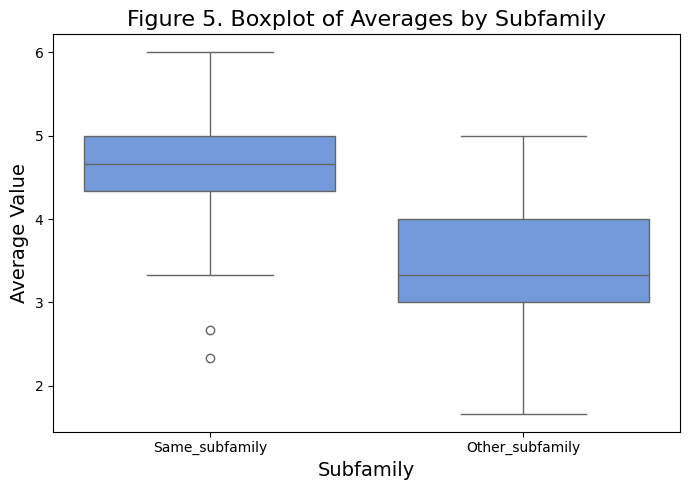

In [ ]:
# Create a long-format DataFrame to facilitate plotting with Seaborn
df_melted = df.melt(value_vars=["Same_subfamily", "Other_subfamily"],
                    var_name="Subfamily",
                    value_name="Value")

# Create a boxplot to compare the two columns with pastel blue color
plt.figure(figsize=(7, 5))
sns.boxplot(x="Subfamily", y="Value", data=df_melted, color='cornflowerblue')

# Add titles and labels
plt.title("Figure 5. Boxplot of Averages by Subfamily", fontsize=16)
plt.xlabel("Subfamily", fontsize=14)
plt.ylabel("Average Value", fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Drop rows containing NaN in the specified columns
df_clean = df.dropna(subset=['Same_subfamily', 'Other_subfamily'])

# Perform the t-test after removing NaN values
t_stat, p_value = stats.ttest_ind(df_clean['Same_subfamily'], df_clean['Other_subfamily'])

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 10.096742096521874
p-value: 1.6513098616086592e-18


## b. Prediction 2

We will now test our second hypothesis: Languages with a small variety of vowels are perceived as less attractive.

I also used the dataset of [Phoible](https://phoible.org) to test P2. Some languages has different inventories in each of them different phonological segments. For this project, in order to simplify everything, I decided to chose for each language the inventory with the most segments.

Using the phonological database Phoible, I was able to obtain the number of vowel segments for each language. We will focus on Russian, Mandarin and Japanese, which have 6, 8 and 11 vowel segments respectively (see Figure 1 in the introduction), significantly less than the other languages.

As with the first hypothesis, we will create two groups: one consisting of Russian, Mandarin and Japanese, and the other consisting of all the remaining languages.

In [ ]:
# List of specific columns for the two groups
small_variety_vowels_columns = ["Russian", "Mandarin", "Japanese"]
big_variety_vowels_columns = ["Italian", "Spanish", "English", "German", "Arabic", "French"]

# Add a column "Big_Variety_Vowels" with the row-wise mean of the columns from the first group
df["Big_Variety_Vowels"] = df[big_variety_vowels_columns].mean(axis=1)

# Add a column "Small_Variety_Vowels" with the row-wise mean of the columns from the second group
df["Small_Variety_Vowels"] = df[small_variety_vowels_columns].mean(axis=1)

# Display the first few rows of the DataFrame to verify
df


<ipython-input-280-31fedaf34828>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Big_Variety_Vowels"] = df[big_variety_vowels_columns].mean(axis=1)
<ipython-input-280-31fedaf34828>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Small_Variety_Vowels"] = df[small_variety_vowels_columns].mean(axis=1)


,Genre,Country,Native_Language,Fluent_Language,Italian,German,English,Japanese,Mandarin,Russian,Spanish,Arabic,French,Culture_Influence,Same_subfamily,Other_subfamily,Big_Variety_Vowels,Small_Variety_Vowels
0,Man,France,Russian,"Russian, English",4.0,4.0,6.0,4.0,4.0,6.0,5.0,4.0,6.0,0,5.000000,4.666667,4.833333,4.666667
1,Woman,France,French,Français,5.0,3.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,0,4.333333,3.666667,3.833333,4.000000
2,Woman,France,French,Français,4.0,3.0,2.0,4.0,1.0,5.0,4.0,3.0,6.0,1,4.666667,3.000000,3.666667,3.333333
3,Woman,France,French,Français,6.0,1.0,5.0,6.0,1.0,1.0,4.0,6.0,4.0,1,4.666667,3.333333,4.333333,2.666667
4,Woman,France,French,"Français, Anglais",5.0,4.0,5.0,3.0,2.0,3.0,4.0,4.0,5.0,1,4.666667,3.500000,4.500000,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Woman,France,Rif,"rif, arabe , francais",4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1,4.000000,4.000000,4.000000,4.000000
74,Woman,France,French,Francais,6.0,3.0,4.0,6.0,3.0,2.0,6.0,1.0,6.0,1,6.000000,3.166667,4.333333,3.666667
75,Woman,France,French,"français, anglais",5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,0,4.666667,4.833333,4.833333,4.666667
76,Woman,France,French,Français & Anglais,4.0,5.0,4.0,5.0,5.0,6.0,5.0,5.0,4.0,1,4.333333,5.000000,4.500000,5.333333


In [ ]:
# Calculate the means of the columns "Big_Variety_Vowels" and "Small_Variety_Vowels"
big_variety_vowels_mean = df["Big_Variety_Vowels"].mean()
small_variety_vowels_mean = df["Small_Variety_Vowels"].mean()

print(f"Mean of languages with wide vowels variety : {big_variety_vowels_mean}")
print(f"Mean of languages with small vowels variety : {small_variety_vowels_mean}")

Mean of languages with wide vowels variety : 4.150900900900901
Mean of languages with small vowels variety : 3.1324200913242013


The average ratings for languages with a smaller variety of vowels are lower compared to the rest of the languages, which seems to support our hypothesis.

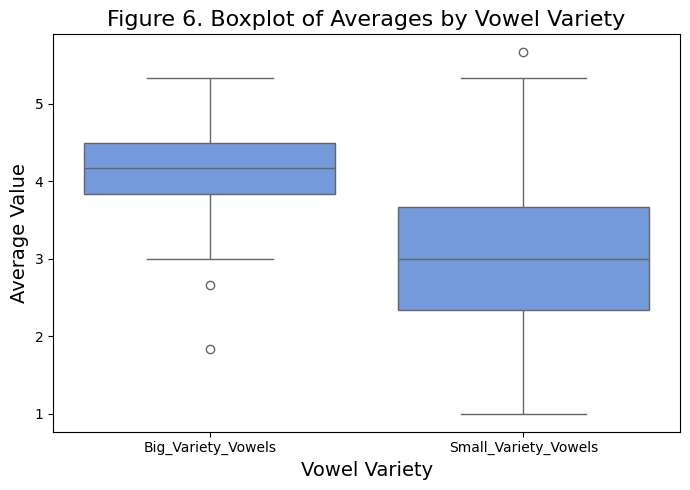

In [ ]:
# Create a long-format DataFrame to facilitate plotting with Seaborn
df_melted_vowels = df.melt(value_vars=["Big_Variety_Vowels", "Small_Variety_Vowels"],
                           var_name="Vowel_Variety",
                           value_name="Value")

# Create a boxplot to compare the two columns
plt.figure(figsize=(7, 5))
sns.boxplot(x="Vowel_Variety", y="Value", data=df_melted_vowels, color='cornflowerblue')

# Add titles and labels
plt.title("Figure 6. Boxplot of Averages by Vowel Variety", fontsize=16)
plt.xlabel("Vowel Variety", fontsize=14)
plt.ylabel("Average Value", fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# Drop rows containing NaN in the columns of interest
df_clean = df.dropna(subset=['Big_Variety_Vowels', 'Small_Variety_Vowels'])

# Perform an independent t-test between the cleaned columns
t_stat_vowels, p_value_vowels = stats.ttest_ind(df_clean['Big_Variety_Vowels'], df_clean['Small_Variety_Vowels'])

# Display the results
print(f"T-statistic: {t_stat_vowels}")
print(f"P-value: {p_value_vowels}")


T-statistic: 7.661362729517472
P-value: 2.4732998253649715e-12


# VI. Annex

Until now, we have focused solely on the phonetic aspects of languages. However, considering that these languages are primarily Indo-European or at least relatively familiar to French speakers, it is likely that the participants were able to identify the languages they were listening to on their own.

This could introduce a socio-cultural bias, as respondents may have rated a language not only based on its phonetic features but also influenced by other factors related to sociology.

For example, negative or positive stereotypes about a country, as well as geopolitical factors, can shape our perception of a language.

To assess this, at the end of the questionnaire, the following question was posed: "Do you think that your perception (positive or negative) of a country's culture influences your perception of its language?"

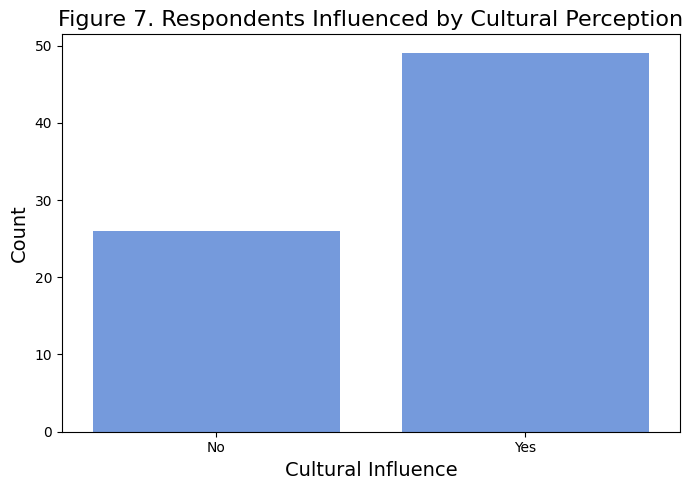

In [ ]:
# Create a barplot for the "Cultural_Influence" column with Yes/No labels
plt.figure(figsize=(7, 5))
sns.countplot(x='Culture_Influence', data=df, color='cornflowerblue')

# Replace 1 with 'Yes' and 0 with 'No' for the x-axis labels
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add titles and labels
plt.title('Figure 7. Respondents Influenced by Cultural Perception', fontsize=16)
plt.xlabel('Cultural Influence', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


# VII. Conclusion

The results of this study reveal significant findings for both hypotheses.

For our first hypothesis, which examined the impact of linguistic subfamilies (here the Romance languages) on perceived attractiveness, the statistical significance supports the hypothesis that French speakers show a preference for languages within the same subfamily (see Figure 5 and $t = 10.5$, $p$ = 1.64e -16 << 0.05).

For the second hypothesis, which explored the role of vowel variety in language attractiveness, the significant results indicate that languages with a smaller variety of vowels (here Russian, Mandarin and Japanese) are perceived as less attractive compared to those with wider vowel variety (see Figure 6 and $t = 7.91$, $p$ = 4.91e -13 << 0.05).


# VIII. Discussion


However, it would be valuable to expand the data collection process to address potential biases related to gender and age. Among the 80 responses to the questionnaire, most participants were individuals within my personal network, primarily female students in their twenties.

Additionally, based on the responses to the question regarding the influence of cultural perception on language evaluation (see Annex Figure 7), it appears that a purely phonetic analysis may not fully explain how languages are perceived.

Moreover, many of the languages featured in the audio recordings are Indo-European, as the initial hypothesis aimed to test whether the subfamily of a language, rather than its linguistic family, plays a more significant role in language perception. To validate this hypothesis, it was necessary to include a high number of Indo-European languages in the study.

Therefore, respondents seem to have been influenced by other cultural factors, such as stereotypes (both positive and negative) about a country or geopolitical considerations.

To mitigate these biases, future research could focus on lesser-known languages to reduce the impact of familiarity. Furthermore, integrating sociolinguistic factors into the study—such as exposure to a language through media, family, or other sources—could provide a more nuanced understanding of language perception. Familiarity with a country’s culture, for instance, may lead to more favorable ratings, highlighting the interplay between cultural context and phonetic features in shaping language preferences.

# IX. Bibliography



*   Anikin A, Aseyev N, Erben Johansson N. Do some languages sound more beautiful than others? Proc Natl Acad Sci U S A. 2023 Apr 25;120(17):e2218367120. doi: 10.1073/pnas.2218367120. Epub 2023 Apr 17. PMID: 37068255; PMCID: PMC10151606.

